# import data

In [27]:
from google.colab import drive
drive.mount("/content/gdrive")#, force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
%cd /content/gdrive/MyDrive/AI_Summit2021-PreHackthon

/content/gdrive/MyDrive/AI_Summit2021-PreHackthon


In [29]:
import pandas as pd
import numpy as np


In [30]:
train = pd.read_csv('train_dataset.csv')
#print(train.dtypes)

# 1.   Missing values: 10500
```
dusage_avg 92%,vusage_onnet_avg17%,vusage_offnet_avg 68%
```





* dusage_avg - 9642 -Skewed -Median
* vusage_onnet_avg - 1828 -Skewed -Median
* vusage_offnet_avg- 7187 -Skewed -Median
* add_on_tot_rental	- 6667 -Skewed -Median
* add_on_count - 6667 - Skewed -Median

In [31]:
train.dusage_avg.fillna(train.dusage_avg.median(),inplace=True)
train.vusage_onnet_avg.fillna(train.vusage_onnet_avg.median(),inplace=True)
train.vusage_offnet_avg.fillna(train.vusage_offnet_avg.median(),inplace=True)
train.add_on_tot_rental.fillna(train.add_on_tot_rental.median(),inplace=True)
train.add_on_count.fillna(train.add_on_count.median(),inplace=True)

* device_type 23 - Skewed - Mode
* device_category 30 - Skewed - Mode
* gender 135 - Skewed - Mode
* age_group 135 - Skewed - Mode


In [32]:
train.device_type.fillna(str(train.device_type.mode()),inplace=True)
train.device_category.fillna(str(train.device_category.mode()),inplace=True)
train.gender.fillna(str(train.gender.mode()),inplace=True)
train.age_group.fillna(str(train.age_group.mode()),inplace=True)

In [33]:
train.isnull().sum()

primary_identifier             0
device_type                    0
device_category                0
gender                         0
district_name                  0
age_group                      0
network_stay                   0
average_monthly_bill_amount    0
dusage_sum                     0
dusage_min                     0
dusage_max                     0
dusage_avg                     0
dusage_days                    0
dusage_stddev                  0
vusage_onnet_sum               0
vusage_onnet_max               0
vusage_onnet_min               0
vusage_onnet_days              0
vusage_onnet_avg               0
vusage_onnet_stddev            0
vusage_offnet_sum              0
vusage_offnet_max              0
vusage_offnet_min              0
vusage_offnet_days             0
vusage_offnet_avg              0
vusage_offnet_stddev           0
number_of_fixed_bb_accounts    0
number_of_iptv_accounts        0
add_on_tot_rental              0
add_on_count                   0
next_month

In [34]:
train.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
0,6875768,4G,Smartphone,MALE,Kegalle,40-50,219,761.62,6317.0,2.773958,622.685848,210.579939,30.0,197.116822,0.0,0.0,0.0,0.0,9.277778,0.0,677.0,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,360.0,2.0,PKG2
1,6406277,4G,Smartphone,MALE,Galle,40-50,36,2482.52,28365.0,3.079438,2569.429138,945.531235,30.0,573.299639,0.0,0.0,0.0,0.0,9.277778,0.0,76.0,35.433333,0.0,15.0,5.071111,6.779644,0.0,0.0,600.0,2.0,PKG1
2,3563570,4G,Smartphone,MALE,Kandy,30-40,186,1565.55,18581.0,48.193713,2739.515326,619.378810,30.0,619.750500,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,0.0,1.0,PKG6
3,1853666,4G,Smartphone,FEMALE,Colombo,40-50,24,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,1110.0,2.0,PKG4
4,2794331,4G,Smartphone,FEMALE,Kandy,50-60,37,2501.75,19736.0,53.302092,1239.220170,657.889802,30.0,329.152516,0.0,0.0,0.0,0.0,9.277778,0.0,258.0,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,PKG4


# Remove covariance features

```
Remove highly collinear variables as measured by a correlation coefficient greater than 0.9
zero variance: 'vusage_onnet_min'
```



In [14]:
# Threshold for removing correlated variables
threshold = 0.9

corr_matrix = train.corr().abs()        # Absolute value correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))                 # Upper triangle of correlations
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]                    ## Select columns with correlations above threshold
train_dropped = train.drop(columns = to_drop)
print(to_drop)

['dusage_avg', 'dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev']


In [15]:
# Zero variance
unique_counts = pd.DataFrame(train.nunique()).sort_values(0, ascending = True)
zero_variance_cols = list(unique_counts[unique_counts[0] == 1].index)
n_zero_variance_cols = len(zero_variance_cols)
print(zero_variance_cols)

['vusage_onnet_min']


# importance of features

```
Remove any features with a zero importance as determined by a gradient boosting machine. (Optional) keep only enough features to account for 95% of the importance in the gradient boosting machine.
```



# Encoding

Label Encoding

In [16]:
df_train_enc=train

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#X=train.drop('next_month_plan',axis=1)
#Y=le.fit_transform(train['next_month_plan'])
df_train_enc['next_month_plan']=le.fit_transform(train['next_month_plan'])

In [17]:
#le.classes_
le.inverse_transform([0,1,2,3,4,5,6])
# dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

array(['PKG1', 'PKG2', 'PKG3', 'PKG4', 'PKG5', 'PKG6', 'PKG7'],
      dtype=object)

categorical data encoding

In [18]:
!pip install category_encoders
import category_encoders as ce
cat_feat = ['age_group','gender','device_type','device_category' ,'district_name']
df_train_enc=df_train_enc.drop(cat_feat,axis=1,inplace=False)

     |████████████████████████████████| 80 kB 6.1 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
# create object of Ordinalencoding
ageencoder= ce.OrdinalEncoder(cols=['age_group'],return_df=True,mapping=[{'col':'age_group',
                                                                 'mapping':{'<20':20,'20-30':20,'30-40':40,'40-50':50,'50-60':60,'60-70':70,'>70':80}}])
df_train_enc['age_group'] = ageencoder.fit_transform(train['age_group'])
print(df_train_enc['age_group'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0        50.0
1        50.0
2        40.0
3        50.0
4        60.0
         ... 
10495    50.0
10496    20.0
10497    40.0
10498    70.0
10499    50.0
Name: age_group, Length: 10500, dtype: float64


In [20]:
#gender with binary encoding
#gendencorder=ce.BinaryEncoder(cols=['gender'],return_df=True)
gendencorder=ce.OrdinalEncoder(cols=['gender'],return_df=True,mapping=[{'col':'gender',
                                                                 'mapping':{'MALE':1,'FEMALE':0}}])
df_train_enc['gender'] = gendencorder.fit_transform(train['gender'])
print(df_train_enc['gender'])

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
10495    1.0
10496    0.0
10497    0.0
10498    1.0
10499    1.0
Name: gender, Length: 10500, dtype: float64


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
#device_type with Binary encoding
#devtypeencorder=ce.HashingEncoder(cols='device_type',n_components=2)
devtypeencorder=ce.BinaryEncoder(cols=['device_type'])
df_devtypeencorder = devtypeencorder.fit_transform(train['device_type'])
print(df_devtypeencorder.shape)
df_train_enc = pd.concat([df_train_enc, df_devtypeencorder], axis=1)
#df_train_enc=df_train_enc.drop('device_type',axis=1,inplace=False)
print(df_train_enc[['device_type_0','device_type_1','device_type_2']])

(10500, 3)
       device_type_0  device_type_1  device_type_2
0                  0              0              1
1                  0              0              1
2                  0              0              1
3                  0              0              1
4                  0              0              1
...              ...            ...            ...
10495              0              0              1
10496              0              0              1
10497              0              0              1
10498              0              0              1
10499              0              1              1

[10500 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [22]:
"""
#device_type with Binary encoding
devcatencoder=ce.BinaryEncoder(cols=['device_category'])
df_devcatencoder = devcatencoder.fit_transform(train['device_category'])
df_devcatencoder
#df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)
#df_train_enc=df_train_enc.drop('device_category',axis=1,inplace=False)
#print(df_train_enc[['device_type_0','device_type_1','device_type_2']])
"""

"\n#device_type with Binary encoding\ndevcatencoder=ce.BinaryEncoder(cols=['device_category'])\ndf_devcatencoder = devcatencoder.fit_transform(train['device_category'])\ndf_devcatencoder\n#df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)\n#df_train_enc=df_train_enc.drop('device_category',axis=1,inplace=False)\n#print(df_train_enc[['device_type_0','device_type_1','device_type_2']])\n"

In [23]:
devcatencoder= ce.BaseNEncoder(cols=['device_category'],return_df=True,base=3)
df_devcatencoder = devcatencoder.fit_transform(train['device_category'])
print(df_devcatencoder.shape)
#df_devcatencoder.head(10)
df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)
#df_train_enc=df_train_enc.drop('device_category',axis=1,inplace=False)
print(df_train_enc[['device_category_0','device_category_1','device_category_2']])

(10500, 3)
       device_category_0  device_category_1  device_category_2
0                      0                  0                  1
1                      0                  0                  1
2                      0                  0                  1
3                      0                  0                  1
4                      0                  0                  1
...                  ...                ...                ...
10495                  0                  0                  1
10496                  0                  0                  1
10497                  0                  0                  1
10498                  0                  0                  1
10499                  0                  0                  1

[10500 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [24]:
districtencoder= ce.BaseNEncoder(cols=['district_name'],return_df=True,base=5)
df_districtencoder = districtencoder.fit_transform(train['district_name'])
#df_districtencoder.head(10)
print(df_districtencoder.shape)
df_train_enc = pd.concat([df_train_enc, df_districtencoder], axis=1)
#df_train_enc=df_train_enc.drop('district_name',axis=1,inplace=False)
print(df_train_enc[['district_name_0','district_name_1','district_name_2','district_name_3']])


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(10500, 4)
       district_name_0  district_name_1  district_name_2  district_name_3
0                    0                0                0                1
1                    0                0                0                2
2                    0                0                0                3
3                    0                0                0                4
4                    0                0                0                3
...                ...              ...              ...              ...
10495                0                0                1                1
10496                0                0                0                4
10497                0                0                0                4
10498                0                0                0                3
10499                0                0                1                3

[10500 rows x 4 columns]


In [25]:
df_train_enc.head()

,primary_identifier,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan,age_group,gender,device_type_0,device_type_1,device_type_2,device_category_0,device_category_1,device_category_2,district_name_0,district_name_1,district_name_2,district_name_3
0,6875768,219,761.62,6317.0,2.773958,622.685848,210.579939,30.0,197.116822,0.0,0.0,0.0,0.0,9.277778,0.0,677.0,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,360.0,2.0,1,50.0,1.0,0,0,1,0,0,1,0,0,0,1
1,6406277,36,2482.52,28365.0,3.079438,2569.429138,945.531235,30.0,573.299639,0.0,0.0,0.0,0.0,9.277778,0.0,76.0,35.433333,0.0,15.0,5.071111,6.779644,0.0,0.0,600.0,2.0,0,50.0,1.0,0,0,1,0,0,1,0,0,0,2
2,3563570,186,1565.55,18581.0,48.193713,2739.515326,619.378810,30.0,619.750500,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,0.0,1.0,5,40.0,1.0,0,0,1,0,0,1,0,0,0,3
3,1853666,24,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,1110.0,2.0,3,50.0,0.0,0,0,1,0,0,1,0,0,0,4
4,2794331,37,2501.75,19736.0,53.302092,1239.220170,657.889802,30.0,329.152516,0.0,0.0,0.0,0.0,9.277778,0.0,258.0,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,3,60.0,0.0,0,0,1,0,0,1,0,0,0,3


In [26]:
df_train_enc.dtypes

primary_identifier               int64
network_stay                     int64
average_monthly_bill_amount    float64
dusage_sum                     float64
dusage_min                     float64
dusage_max                     float64
dusage_avg                     float64
dusage_days                    float64
dusage_stddev                  float64
vusage_onnet_sum               float64
vusage_onnet_max               float64
vusage_onnet_min               float64
vusage_onnet_days              float64
vusage_onnet_avg               float64
vusage_onnet_stddev            float64
vusage_offnet_sum              float64
vusage_offnet_max              float64
vusage_offnet_min              float64
vusage_offnet_days             float64
vusage_offnet_avg              float64
vusage_offnet_stddev           float64
number_of_fixed_bb_accounts    float64
number_of_iptv_accounts        float64
add_on_tot_rental              float64
add_on_count                   float64
next_month_plan          

# Mapping string values to intergers



In [135]:
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [136]:
df_train_enc=mapping(train,"next_month_plan")
df_train_enc=mapping(train,"age_group")
df_train_enc=mapping(train,"gender")
df_train_enc=mapping(train,"device_type")
df_train_enc=mapping(train,"device_category")
df_train_enc=mapping(train,"district_name")

In [137]:
df_train_enc

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
0,6875768,0,1,0,14,4,219,761.62,6317.0,2.773958,622.685848,210.579939,30.0,197.116822,0.0,0.000000,0.0,0.0,9.277778,0.000000,677.0,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,360.0,2.0,6
1,6406277,0,1,0,20,4,36,2482.52,28365.0,3.079438,2569.429138,945.531235,30.0,573.299639,0.0,0.000000,0.0,0.0,9.277778,0.000000,76.0,35.433333,0.0,15.0,5.071111,6.779644,0.0,0.0,600.0,2.0,7
2,3563570,0,1,0,15,5,186,1565.55,18581.0,48.193713,2739.515326,619.378810,30.0,619.750500,0.0,0.000000,0.0,0.0,9.277778,0.000000,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,0.0,1.0,2
3,1853666,0,1,1,21,4,24,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.000000,0.0,0.0,9.277778,0.000000,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,1110.0,2.0,4
4,2794331,0,1,1,15,3,37,2501.75,19736.0,53.302092,1239.220170,657.889802,30.0,329.152516,0.0,0.000000,0.0,0.0,9.277778,0.000000,258.0,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,1438655,0,1,0,16,4,64,2088.13,479.0,0.346959,226.626969,15.972982,30.0,41.785388,318.0,43.433333,0.0,12.0,26.519444,16.035284,102.0,29.866667,0.0,7.0,14.571429,8.017054,0.0,0.0,360.0,2.0,2
10496,7827264,0,1,1,21,1,6,2053.50,23168.0,0.219985,2525.781404,926.754902,25.0,683.641213,0.0,0.000000,0.0,0.0,9.277778,0.000000,32.0,25.366667,0.0,3.0,10.861111,5.151029,0.0,0.0,580.0,3.0,7
10497,1433957,0,1,1,21,5,69,2827.33,4553.0,4.831711,581.854178,151.773327,30.0,161.529659,0.0,0.000000,0.0,0.0,9.277778,0.000000,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,1.0,360.0,2.0,2
10498,8494507,0,1,0,15,2,233,645.43,2069.0,4.722031,191.290240,68.986909,30.0,53.804147,0.0,0.000000,0.0,0.0,9.277778,0.000000,105.0,18.650000,0.0,18.0,5.887963,4.956822,0.0,1.0,360.0,2.0,7


# Random Under sampling

In [214]:
# Class count
count_class_0, count_class_1,count_class_2, count_class_3,count_class_4, count_class_5,count_class_6, count_class_7 = df_train_enc.next_month_plan.value_counts()

# Divide by class
df_class_0 = df_train_enc[df_train_enc['next_month_plan'] == 0]
df_class_1 = df_train_enc[df_train_enc['next_month_plan'] == 1]
df_class_2 = df_train_enc[df_train_enc['next_month_plan'] == 2]
df_class_3 = df_train_enc[df_train_enc['next_month_plan'] == 3]
df_class_4 = df_train_enc[df_train_enc['next_month_plan'] == 4]
df_class_5 = df_train_enc[df_train_enc['next_month_plan'] == 5]
df_class_6 = df_train_enc[df_train_enc['next_month_plan'] == 6]
df_class_7 = df_train_enc[df_train_enc['next_month_plan'] == 7]

In [ ]:
%%script false
df_class_0_under = df_class_0.sample(count_class_2)
df_train_under = pd.concat([df_class_0_under, df_class_1,df_class_2,df_class_3,df_class_4,df_class_5,df_class_6,df_class_7], axis=0)

print('Random under-sampling:')
print(df_train_under.next_month_plan.value_counts())

df_train_under.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


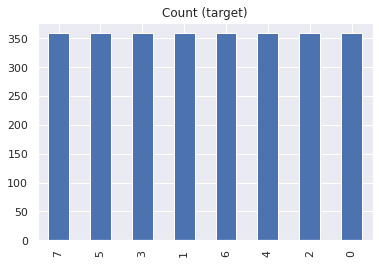

In [250]:
from imblearn.under_sampling import RandomUnderSampler

X=df_train_enc.drop('next_month_plan',axis=1)
Y=df_train_enc['next_month_plan']

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, Y)
X_rus = pd. DataFrame(X_rus, columns=list(X.columns))
y_rus = pd. DataFrame(y_rus, columns=['next_month_plan'])
df_train_under = pd.concat([X_rus,y_rus], axis=1)
df_train_under.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');

# Random Over Sampling

In [387]:
%%script false
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)
df_class_4_over = df_class_4.sample(count_class_0, replace=True)
df_class_5_over = df_class_5.sample(count_class_0, replace=True)
df_class_6_over = df_class_6.sample(count_class_0, replace=True)
df_class_7_over = df_class_7.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over,df_class_2_over,df_class_3_over,df_class_4_over,df_class_5_over,df_class_6_over,df_class_7_over], axis=0)

print('Random over-sampling:')
print(df_train_over.next_month_plan.value_counts())

df_train_over.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


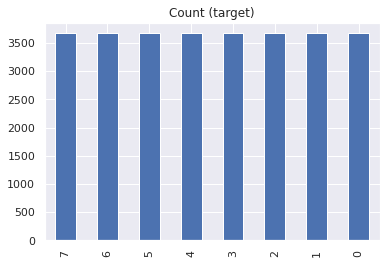

In [388]:
from imblearn.over_sampling import RandomOverSampler

X=df_train_enc.drop('next_month_plan',axis=1)
Y=df_train_enc['next_month_plan']

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, Y)
X_ros = pd. DataFrame(X_ros, columns=list(X.columns))
y_ros = pd. DataFrame(y_ros, columns=['next_month_plan'])
df_train_over = pd.concat([X_ros,y_ros], axis=1)
df_train_over.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');

# oversampling SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

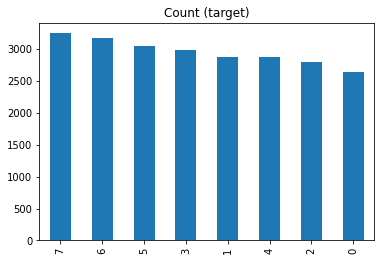

In [23]:
from imblearn.combine import SMOTETomek

X=df_train_enc.drop('next_month_plan',axis=1)
Y=df_train_enc['next_month_plan']

smote = SMOTETomek(ratio='auto')
X_sm, y_sm = smote.fit_sample(X, Y)

X_sm = pd. DataFrame(X_sm, columns=list(X.columns))
y_sm = pd. DataFrame(y_sm, columns=['next_month_plan'])
df_train_smt = pd.concat([X_sm,y_sm], axis=1)
df_train_smt.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');

In [24]:
df_train_smt.head()

,primary_identifier,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,age_group,gender,device_type_0,device_type_1,device_type_2,device_category_0,device_category_1,device_category_2,district_name_0,district_name_1,district_name_2,district_name_3,next_month_plan
0,6875768.0,219.0,761.62,6317.0,2.773958,622.685848,210.579939,30.0,197.116822,0.0,0.0,0.0,0.0,9.277778,0.0,677.0,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,360.0,2.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,6406277.0,36.0,2482.52,28365.0,3.079438,2569.429138,945.531235,30.0,573.299639,0.0,0.0,0.0,0.0,9.277778,0.0,76.0,35.433333,0.0,15.0,5.071111,6.779644,0.0,0.0,600.0,2.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
2,3563570.0,186.0,1565.55,18581.0,48.193713,2739.515326,619.378810,30.0,619.750500,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5
3,1853666.0,24.0,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,1110.0,2.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3
4,2794331.0,37.0,2501.75,19736.0,53.302092,1239.220170,657.889802,30.0,329.152516,0.0,0.0,0.0,0.0,9.277778,0.0,258.0,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3


In [25]:
df_train_smt.shape

(23664, 38)

# Model | Training 

In [26]:
df_training=df_train_smt #df_train_over , df_train_under, df_train_enc, df_train_smt
#5 covariate features : 'device_category', 'dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev'
#0 missing values: dusage_avg 92%,vusage_onnet_avg17%,vusage_offnet_avg 68%
#1 zero variance: 'vusage_onnet_min'
droplogreg=['vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'add_on_count', 'age_group', 'gender', 'device_type_0', 'device_type_1', 'device_type_2', 'device_category_0', 'device_category_1', 'device_category_2', 'district_name_0', 'district_name_1', 'district_name_2', 'district_name_3']
droprf=[ 'average_monthly_bill_amount', 'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_stddev', 'vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'add_on_tot_rental', 'device_type_0', 'device_category_0', 'device_category_1', 'district_name_0', 'district_name_1']

dropx=['number_of_fixed_bb_accounts', 'number_of_iptv_accounts','vusage_onnet_min', 'vusage_offnet_min']#, 'device_type_0']
dropfeat=['next_month_plan','primary_identifier','district_name_0','district_name_1','district_name_2','district_name_3','device_category_0', 'device_category_1','device_category_2', 'dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev'] 

X=df_training.drop(dropfeat+dropx,axis=1)
Y=df_training['next_month_plan']

## Normalize Standadize

In [27]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
print(scaler.mean_)
print(scaler.scale_)
X = scaler.transform(X)

[9.99867551e+01 2.83635564e+03 1.74584086e+04 1.05328695e+02
 1.95253478e+03 2.62800186e+01 2.02693693e+01 4.92374912e+00
 7.44394121e-01 1.03140087e+01 6.63308991e+01 1.40165119e+01
 7.22306087e+00 6.55896332e+00 5.38716031e+02 1.92917875e+00
 4.31284429e+01 6.74208901e-01 1.95768365e-03 6.89683477e-02
 9.45785519e-01]
[6.34125699e+01 1.64083320e+03 1.77129841e+04 1.89612778e+02
 2.18238524e+03 7.55927045e+00 1.09080950e+02 1.88600861e+01
 2.54895476e+00 7.83722269e+00 1.36197958e+02 2.24671273e+01
 8.62890961e+00 6.94815272e+00 5.57209647e+02 8.92762290e-01
 1.44280355e+01 4.50820115e-01 3.96499462e-02 2.32157160e-01
 2.08043484e-01]


In [28]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3,random_state = 42)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [30]:
X_train

array([[-0.69297241,  0.45153768,  0.80748925, ..., -0.04937418,
         1.54672855,  0.26059206],
       [-1.16802979, -0.80998053,  0.01426517, ..., -0.04937418,
        -0.29707612,  0.26059206],
       [-1.49791682, -1.29591822, -0.98297433, ..., -0.04937418,
        -0.29707612,  0.26059206],
       ...,
       [-0.01556088, -0.2706769 , -0.8490048 , ..., -0.04937418,
        -0.29707612,  0.26059206],
       [ 0.82460223, -0.27367967,  0.04464588, ..., -0.04937418,
        -0.29707612,  0.26059206],
       [ 0.06452233,  0.53401549,  0.24510513, ..., -0.04937418,
        -0.29707612,  0.26059206]])

# Pipeline with Scale Standardizer

In [190]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, Y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)) #LogisticRegression(C=8))
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=6, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=Fals

In [181]:
print(pipe.score(X_test, y_test))

0.88


In [192]:
y_predict_test_pipe = pipe.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accuracy score: {accuracy_score(y_test,y_predict_test_pipe)}")

Accuracy score: 0.88


In [183]:
from sklearn.metrics import f1_score
print(f"f1_score-macro: {f1_score(y_test,y_predict_test_pipe, average='macro')}")

f1_score-macro: 0.8768472906403941


In [184]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, Y, cv=5)
print(scores)

[0.95 0.95 0.85 0.95 0.95]


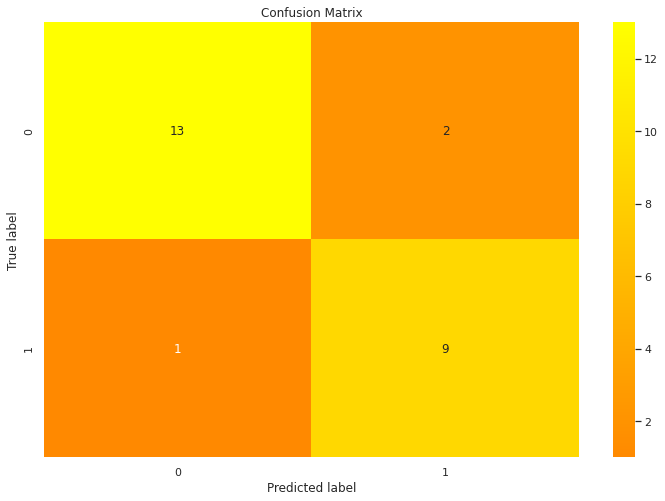

In [194]:
cm_pipe = confusion_matrix(y_test,y_predict_test_pipe)
draw_confusion_matrix(cm_pipe)

# LogisticRegression

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42,max_iter=200,solver='liblinear') #newton-cg", "sag", "lbfgs" and "liblinear"
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.4416656622875738
0.42449381327334085


In [375]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict_test_logreg))
print(f"Accuracy score: {accuracy_score(y_test,y_predict_test_logreg)}")

              precision    recall  f1-score   support

           0       0.45      0.54      0.49       995
           1       0.39      0.31      0.35       960
           2       0.39      0.27      0.32       954
           3       0.42      0.68      0.52       837
           4       0.46      0.51      0.48       893
           5       0.36      0.21      0.26       818
           6       0.38      0.42      0.40       842
           7       0.52      0.47      0.49       813

    accuracy                           0.42      7112
   macro avg       0.42      0.43      0.41      7112
weighted avg       0.42      0.42      0.41      7112

Accuracy score: 0.42449381327334085


In [376]:
from sklearn.metrics import f1_score
print(f"f1_score-macro: {f1_score(y_test,y_predict_test_logreg, average='macro')}")

f1_score-macro: 0.41322909132116176


In [377]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, Y, cv=5)
print(scores)

[0.41058625 0.42796878 0.44885045 0.44062434 0.45285805]


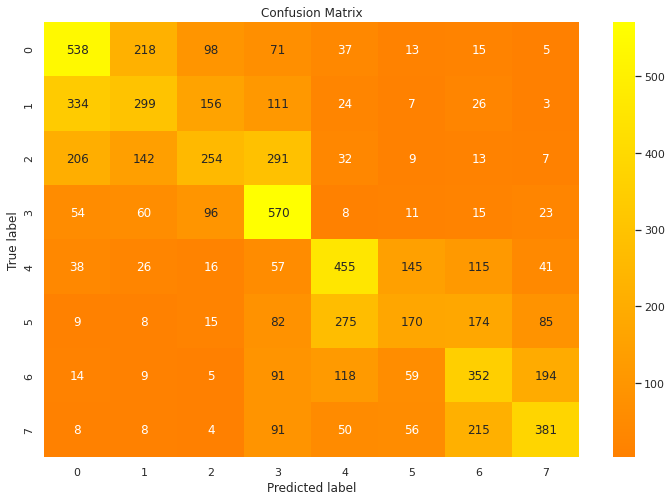

In [378]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

# RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy',min_samples_leaf= 1,min_samples_split= 2)
rf = RandomForestClassifier(random_state=42, n_estimators=150,criterion='entropy',bootstrap= False,max_depth= 34,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

1.0
0.7397183098591549


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test_rf))
print(f"Accuracy score: {accuracy_score(y_test,y_predict_test_rf)}")

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       827
           1       0.68      0.66      0.67       861
           2       0.64      0.61      0.63       814
           3       0.71      0.80      0.75       893
           4       0.74      0.72      0.73       861
           5       0.75      0.69      0.72       894
           6       0.83      0.83      0.83       970
           7       0.81      0.89      0.85       980

    accuracy                           0.74      7100
   macro avg       0.74      0.73      0.73      7100
weighted avg       0.74      0.74      0.74      7100

Accuracy score: 0.7397183098591549


In [35]:
from sklearn.metrics import f1_score
print(f"f1_score-macro: {f1_score(y_test,y_predict_test_rf, average='macro')}")

f1_score-macro: 0.7338841436883218


In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, cv=5)
print(scores)

[0.70103528 0.73779844 0.78639341 0.78956265 0.79923922]


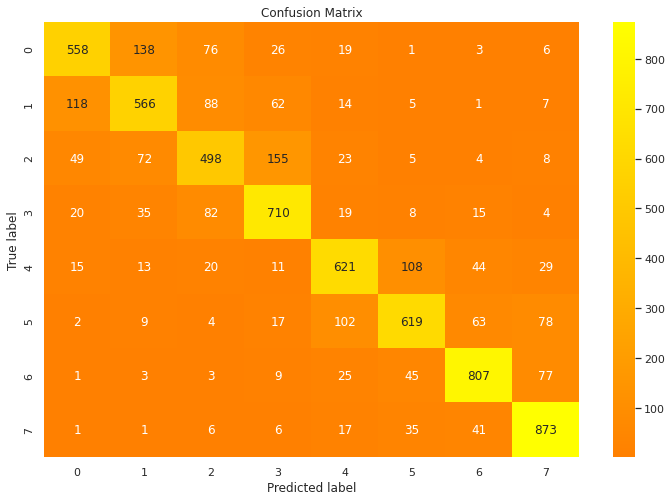

In [37]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)

In [38]:
# save
import joblib
joblib.dump(rf, "./rf_os_fe_hp_6978.joblib")

['./rf_os_fe_hp_6978.joblib']

In [301]:
#sns.pairplot(df_train_enc.drop('primary_identifier', axis=1), aspect=1.5)
#plt.show()

# RF Hyper parameter tuning

In [464]:
rf #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [466]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 100, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [6, 15, 24, 34, 43, 53, 62, 71, 81, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [468]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 70.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=6,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [469]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 34,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [470]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_accuracy = evaluate(rf, X, Y)

best_rf = rf_random.best_estimator_
random_accuracy = evaluate(best_rf, X, Y)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.7974 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of nan%.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


# Auto Feature selection\n
Recursive feature elimination: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

https://www.kaggle.com/ihelon/titanic-hyperparameter-tuning-with-gridsearchcv

In [451]:
X=df_training.drop('next_month_plan',axis=1)
Y=df_training['next_month_plan']

In [417]:
from sklearn.feature_selection import RFE

logregselector = RFE(logreg, n_features_to_select=20, step=1)
logregselector = logregselector.fit(X, Y)

In [452]:
from sklearn.feature_selection import RFE
rfselector = RFE(rf, n_features_to_select=20, step=1)
rfselector = rfselector.fit(X, Y)

In [454]:
imp_col=pd.DataFrame({'logreg':logregselector.get_support(),'rf':rfselector.get_support(),'X':X.columns})
print(list((imp_col.loc[(imp_col['rf'] == False) & (imp_col['logreg'] == False)]).X) )#| (imp_col['logreg'] == False)]
print(list((imp_col.loc[(imp_col['logreg'] == False) ]).X) )

['vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'device_type_0', 'device_category_0', 'device_category_1', 'district_name_0', 'district_name_1']
['primary_identifier', 'average_monthly_bill_amount', 'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_stddev', 'vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'add_on_tot_rental', 'device_type_0', 'device_category_0', 'device_category_1', 'district_name_0', 'district_name_1']


# Outliers

In [ ]:
features = df_training.columns
for col in features:
    df_training.boxplot(column=col, by='next_month_plan', figsize=(6,6))
    plt.title(col)
plt.show()

In [ ]:
features = ['add_on_tot_rental','log10_add_on_tot_rental','add_on_tot_rental','log10_average_monthly_bill_amount']
for col in features:
    df_train_cal.boxplot(column=col, by='next_month_plan', figsize=(6,6))
    plt.title(col)
plt.show()

In [ ]:
for column in df_training:
    plt.figure()
    df_training.boxplot([column])

In [ ]:
print(len(train.columns))
grphtrain=train.drop('primary_identifier',axis=1)
grphtrain.columns

31


Index(['device_type', 'device_category', 'gender', 'district_name',
       'age_group', 'network_stay', 'average_monthly_bill_amount',
       'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
       'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
       'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
       'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
       'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count',
       'next_month_plan'],
      dtype='object')

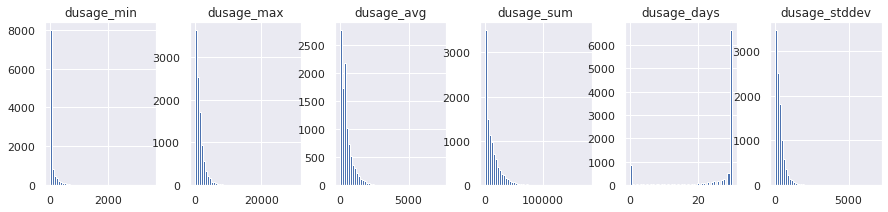

In [ ]:
grphtrain[[ 'dusage_min', 'dusage_max', 'dusage_avg','dusage_sum', 'dusage_days','dusage_stddev']].hist(figsize=(15,3),layout=(1,6),bins=50)
plt.show()

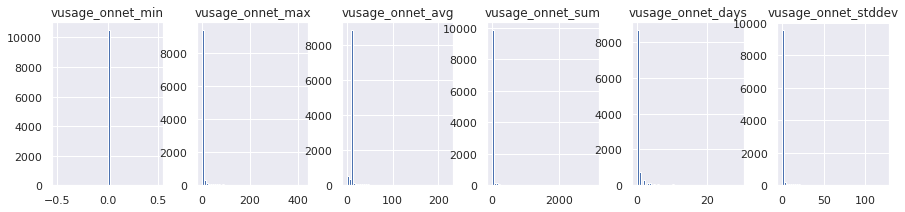

In [ ]:
grphtrain[['vusage_onnet_min', 'vusage_onnet_max', 'vusage_onnet_avg','vusage_onnet_sum', 'vusage_onnet_days','vusage_onnet_stddev']].hist(figsize=(15,3),layout=(1,6),bins=50)
plt.show()

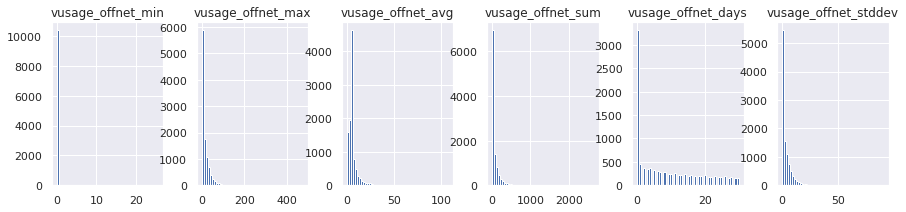

In [ ]:
grphtrain[['vusage_offnet_min', 'vusage_offnet_max','vusage_offnet_avg', 'vusage_offnet_sum','vusage_offnet_days', 'vusage_offnet_stddev']].hist(figsize=(15,3),layout=(1,6),bins=50)
plt.show()

LinAlgError: ignored

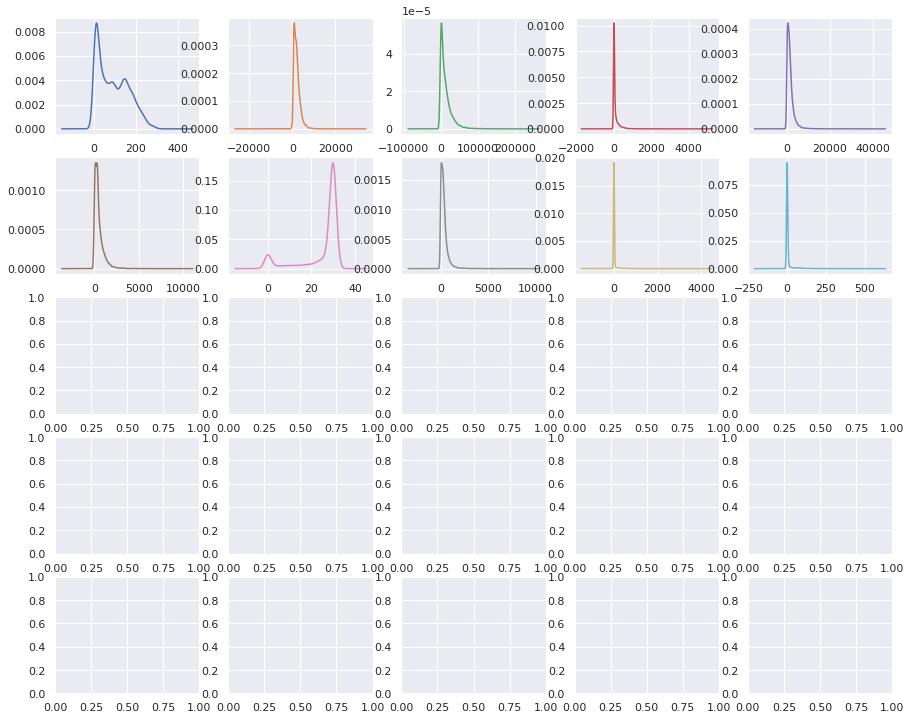

In [ ]:
grphtrain.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

# correlation heat map

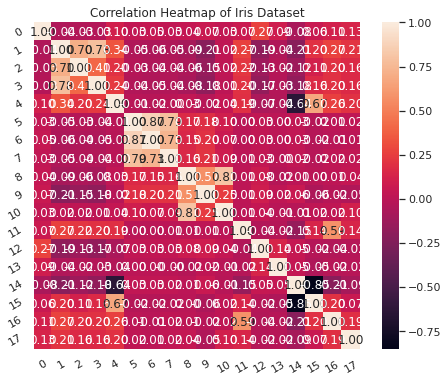

[]


In [ ]:
df_X = pd.DataFrame(X)
corr_matrix = df_X.corr()

plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

# Prediction_Sub1

In [ ]:
# load, no need to initialize the loaded_rf
import joblib
loaded_rf = joblib.load("./rf_os_48085.joblib")

In [ ]:
test = pd.read_csv('test_dataset.csv')

#Missing values
test.dusage_avg.fillna(test.dusage_avg.median(),inplace=True)
test.vusage_onnet_avg.fillna(test.vusage_onnet_avg.median(),inplace=True)
test.vusage_offnet_avg.fillna(test.vusage_offnet_avg.median(),inplace=True)
test.add_on_tot_rental.fillna(test.add_on_tot_rental.median(),inplace=True)
test.add_on_count.fillna(test.add_on_count.median(),inplace=True)

test.device_type.fillna(str(test.device_type.mode()),inplace=True)
test.device_category.fillna(str(test.device_category.mode()),inplace=True)
test.gender.fillna(str(test.gender.mode()),inplace=True)
test.age_group.fillna(str(test.age_group.mode()),inplace=True)
print(test.isnull().sum())

In [ ]:
test.head()

In [ ]:
df_test_enc=test
#df_test_enc['next_month_plan']=le.fit_transform(test['next_month_plan']
# le.inverse_transform([0,1,2,3,4,5,6])

df_test_enc=df_test_enc.drop(cat_feat,axis=1,inplace=False)
df_test_enc['age_group'] = ageencoder.fit_transform(test['age_group'])
df_test_enc['gender'] = gendencorder.fit_transform(test['gender'])
#3
df_devtypeencorder = devtypeencorder.fit_transform(test['device_type'])
df_test_enc = pd.concat([df_test_enc, df_devtypeencorder], axis=1)
#3
df_devcatencoder = devcatencoder.fit_transform(test['device_category'])
df_test_enc = pd.concat([df_test_enc, df_devcatencoder], axis=1)
#4
df_districtencoder = districtencoder.fit_transform(test['district_name'])
df_test_enc = pd.concat([df_test_enc, df_districtencoder], axis=1)


In [ ]:
df_test_enc.head()

In [ ]:
df_test_enc.shape #4500

In [ ]:
#over sampling.... df_test_enc=df_test_over
df_predicting=df_test_enc
dropfeat=['vusage_onnet_min','district_name_0','district_name_1','district_name_2','district_name_3']

X_pred=df_predicting.drop(dropfeat,axis=1)

In [ ]:
y_result_test_logreg = logreg.predict(X_pred)
y_result_test_rf = rf.predict(X_pred)

In [ ]:
y_result_pkg_logreg=le.inverse_transform(y_result_test_logreg)
y_result_pkg_rf=le.inverse_transform(y_result_test_rf)

In [ ]:
y_result_pkg_rf

In [ ]:
d={'primary_identifier':list(X_pred['primary_identifier']),'next_month_plan_pkg':y_result_pkg_rf,'next_month_plan_code':y_result_test_rf}
results_df = pd.DataFrame(d)

In [ ]:
results_df.to_csv('sub_os_4862_pred.csv')

# Prediction Sub2

In [75]:
# load, no need to initialize the loaded_rf
import joblib
loaded_rf = joblib.load("./rf_os_fe_hp_6978.joblib")

In [76]:
#test = pd.read_csv('train_dataset.csv')
#test=test.drop('next_month_plan',axis=1)
test = pd.read_csv('test_dataset.csv')
"""
#Missing values
test.dusage_avg.fillna(test.dusage_avg.median(),inplace=True)
test.vusage_onnet_avg.fillna(test.vusage_onnet_avg.median(),inplace=True)
test.vusage_offnet_avg.fillna(test.vusage_offnet_avg.median(),inplace=True)
test.add_on_tot_rental.fillna(test.add_on_tot_rental.median(),inplace=True)
test.add_on_count.fillna(test.add_on_count.median(),inplace=True)

test.device_type.fillna(str(test.device_type.mode()),inplace=True)
test.device_category.fillna(str(test.device_category.mode()),inplace=True)
test.gender.fillna(str(test.gender.mode()),inplace=True)
test.age_group.fillna(str(test.age_group.mode()),inplace=True)
print(test.isnull().sum())
"""

'\n#Missing values\ntest.dusage_avg.fillna(test.dusage_avg.median(),inplace=True)\ntest.vusage_onnet_avg.fillna(test.vusage_onnet_avg.median(),inplace=True)\ntest.vusage_offnet_avg.fillna(test.vusage_offnet_avg.median(),inplace=True)\ntest.add_on_tot_rental.fillna(test.add_on_tot_rental.median(),inplace=True)\ntest.add_on_count.fillna(test.add_on_count.median(),inplace=True)\n\ntest.device_type.fillna(str(test.device_type.mode()),inplace=True)\ntest.device_category.fillna(str(test.device_category.mode()),inplace=True)\ntest.gender.fillna(str(test.gender.mode()),inplace=True)\ntest.age_group.fillna(str(test.age_group.mode()),inplace=True)\nprint(test.isnull().sum())\n'

In [77]:
test.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count
0,2003793,4G,Smartphone,MALE,Colombo,40-50,4,689.42,148.0,0.000000,148.146634,37.037382,4.0,38.251243,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,1.0,NaN,NaN
1,1776101,4G,Smartphone,MALE,Colombo,40-50,7,799.93,300.0,0.180222,119.466825,10.027957,30.0,24.125172,0.0,0.0,0.0,0.0,NaN,0.0,107.0,16.266667,0.0,21.0,5.107143,4.924111,0.0,0.0,NaN,NaN
2,6945050,2G,Basic,MALE,Colombo,20-30,20,1538.45,8215.0,0.000000,4048.511104,2053.950266,4.0,932.358667,0.0,0.0,0.0,0.0,NaN,0.0,108.0,90.000000,0.0,8.0,13.558333,16.397071,0.0,0.0,110.0,2.0
3,2472049,4G,Smartphone,FEMALE,Matara,40-50,10,995.75,11613.0,0.000000,1057.448432,430.118721,27.0,268.457304,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.416667,0.0,2.0,0.333333,0.087355,0.0,0.0,NaN,NaN
4,7197266,4G,Smartphone,MALE,Kandy,30-40,154,553.61,26505.0,28.515345,2490.832742,883.505624,30.0,660.353290,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,350.0,1.0


In [78]:
df_test_enc=test
#df_test_enc['next_month_plan']=le.fit_transform(test['next_month_plan']
# le.inverse_transform([0,1,2,3,4,5,6])

df_test_enc=df_test_enc.drop(cat_feat,axis=1,inplace=False)
df_test_enc['age_group'] = ageencoder.fit_transform(test['age_group'])
df_test_enc['gender'] = gendencorder.fit_transform(test['gender'])
#3
df_devtypeencorder = devtypeencorder.fit_transform(test['device_type'])
df_test_enc = pd.concat([df_test_enc, df_devtypeencorder], axis=1)
#3
df_devcatencoder = devcatencoder.fit_transform(test['device_category'])
df_test_enc = pd.concat([df_test_enc, df_devcatencoder], axis=1)
#4
df_districtencoder = districtencoder.fit_transform(test['district_name'])
df_test_enc = pd.concat([df_test_enc, df_districtencoder], axis=1)


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [79]:
df_test_enc.head()

,primary_identifier,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,age_group,gender,device_type_0,device_type_1,device_type_2,device_category_0,device_category_1,device_category_2,district_name_0,district_name_1,district_name_2,district_name_3
0,2003793,4,689.42,148.0,0.000000,148.146634,37.037382,4.0,38.251243,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,1.0,NaN,NaN,50.0,1.0,0,0,1,0,0,1,0,0,0,1
1,1776101,7,799.93,300.0,0.180222,119.466825,10.027957,30.0,24.125172,0.0,0.0,0.0,0.0,NaN,0.0,107.0,16.266667,0.0,21.0,5.107143,4.924111,0.0,0.0,NaN,NaN,50.0,1.0,0,0,1,0,0,1,0,0,0,1
2,6945050,20,1538.45,8215.0,0.000000,4048.511104,2053.950266,4.0,932.358667,0.0,0.0,0.0,0.0,NaN,0.0,108.0,90.000000,0.0,8.0,13.558333,16.397071,0.0,0.0,110.0,2.0,20.0,1.0,0,1,0,0,0,2,0,0,0,1
3,2472049,10,995.75,11613.0,0.000000,1057.448432,430.118721,27.0,268.457304,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.416667,0.0,2.0,0.333333,0.087355,0.0,0.0,NaN,NaN,50.0,0.0,0,0,1,0,0,1,0,0,0,2
4,7197266,154,553.61,26505.0,28.515345,2490.832742,883.505624,30.0,660.353290,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,350.0,1.0,40.0,1.0,0,0,1,0,0,1,0,0,0,3


In [80]:
df_test_enc.shape #4500

(4500, 37)

In [67]:
"""
#SMOTETomek - oversampling
X_t=df_test_enc.drop('next_month_plan',axis=1)
Y_t=df_test_enc['next_month_plan']
X_smt, y_smt = smote.fit_sample(X_t, Y_t)

X_smt = pd. DataFrame(X_smt, columns=list(X_t.columns))
y_smt = pd. DataFrame(y_smt, columns=['next_month_plan'])
df_test_smt = pd.concat([X_smt,y_smt], axis=1)
df_test_smt.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');
"""

"\n#SMOTETomek - oversampling\nX_t=df_test_enc.drop('next_month_plan',axis=1)\nY_t=df_test_enc['next_month_plan']\nX_smt, y_smt = smote.fit_sample(X_t, Y_t)\n\nX_smt = pd. DataFrame(X_smt, columns=list(X_t.columns))\ny_smt = pd. DataFrame(y_smt, columns=['next_month_plan'])\ndf_test_smt = pd.concat([X_smt,y_smt], axis=1)\ndf_test_smt.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');\n"

In [81]:
#over sampling.... df_test_enc=df_test_smt
df_predicting=df_test_enc
dropx=['number_of_fixed_bb_accounts', 'number_of_iptv_accounts','vusage_onnet_min', 'vusage_offnet_min']#, 'device_type_0']
dropfeat=['primary_identifier','district_name_0','district_name_1','district_name_2','district_name_3','device_category_0', 'device_category_1','device_category_2', 'dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev'] 

X_pred=df_predicting.drop(dropfeat+dropx,axis=1)

In [ ]:
#y_result_test_logreg = logreg.predict(X_pred)
y_result_test_rf = rf.predict(X_pred)

In [70]:
#y_result_pkg_logreg=le.inverse_transform(y_result_test_logreg)
y_result_pkg_rf=le.inverse_transform(y_result_test_rf)

In [71]:
y_result_pkg_rf

array(['PKG4', 'PKG4', 'PKG8', ..., 'PKG8', 'PKG4', 'PKG4'], dtype=object)

In [72]:
d={'primary_identifier':list(df_predicting['primary_identifier']),'next_month_plan_pkg':y_result_pkg_rf,'next_month_plan_code':y_result_test_rf}
results_df = pd.DataFrame(d)

In [73]:
results_df.to_csv('rf_os_fe_hp_6978.csv')